In [15]:
import numpy as np
import matplotlib.pyplot as plt
from empca import empca,classic_pca
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [22]:
seed = np.random.seed(1)
def makemydata(N,D,sigma=0.5):
    """
    Make a data set drawn from a Gaussian of arbitrary dimension with an arbitrary number of data points, 
    then add Gaussian noise to each point.
    """
    data = np.zeros((N,D))
    for d in range(D):
        center = 2*np.random.random()
        data[:,d] = np.random.normal(loc=center,size=N,scale=sigma)
    uncertainty = np.ones(data.shape)*sigma
    return data,uncertainty,sigma


In [23]:
def cross_streams(vals,value,gt=True):
    if gt:
        if np.where(vals>value)[0].size > 0:
            return np.where(vals>value)[0][0]-1
        else: 
            return None
    elif not gt:
        if np.where(vals<value)[0].size > 0:
            return np.where(vals<value)[0][0]-1
        else: 
            return None

# Classical PCA #

## 10 eigenvectors ##

In [24]:
N = 100
D = 200
data, uncertainty, Sd = makemydata(N,D,sigma=0.7)

0.49 0.491624434503 0.00330421840205


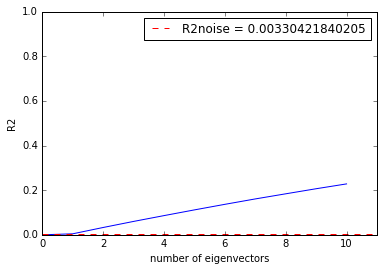

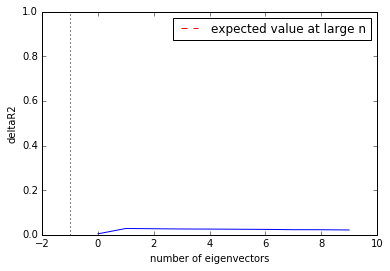

In [25]:
e = classic_pca(data,nvec=10)
vecs = len(e.eigvec)
R2Array = np.zeros(vecs+1)
for vec in range(vecs+1):
    R2Array[vec] = e.R2(vec)

Vdata = e._unmasked_data_var                                            
Vnoise = np.mean(1./(e.weights[e.weights!=0]))
Vnoise = Sd**2

R2noise = 1.-(Vnoise/Vdata)
print Vnoise, Vdata, R2noise

plt.figure()
plt.plot(R2Array)
plt.axhline(R2noise,ls='--',color='r',label = 'R2noise = {0}'.format(R2noise))
plt.ylim(0,1)
plt.ylabel('R2')
plt.xlim(0,len(R2Array))
plt.legend(loc='best')
plt.xlabel('number of eigenvectors')
deltR2 = (R2Array-np.roll(R2Array,1))[1:]
if cross_streams(R2Array,R2noise):
    plt.axvline(cross_streams(R2Array,R2noise),color='k',ls=':')
plt.figure()
if cross_streams(deltR2,Sd**2/Vdata,gt=False):
    plt.axvline(cross_streams(deltR2,Sd**2/Vdata,gt=False),color='k',ls=':')
plt.plot(deltR2)
plt.axhline(Sd**2/Vdata,ls='--',color='r',label = 'expected value at large n')
plt.legend(loc = 'best')
plt.ylabel('deltaR2')
plt.xlabel('number of eigenvectors')

## 50 eigenvectors ##

0.49 0.491624434503 0.00330421840205


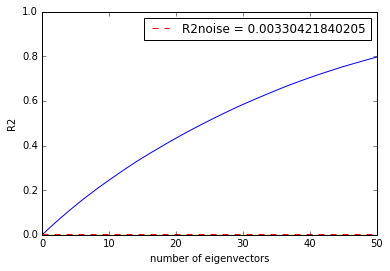

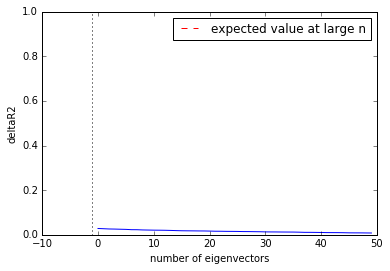

In [26]:
e = classic_pca(data,nvec=50)
vecs = len(e.eigvec)
R2Array = np.zeros(vecs+1)
for vec in range(vecs+1):
    R2Array[vec] = e.R2(vec)

Vdata = e._unmasked_data_var
                                                
Vnoise = np.mean(1./(e.weights[e.weights!=0]))
Vnoise = Sd**2

R2noise = 1.-(Vnoise/Vdata)
print Vnoise, Vdata, R2noise

plt.figure()
plt.plot(R2Array)
plt.axhline(R2noise,ls='--',color='r',label = 'R2noise = {0}'.format(R2noise))
plt.ylim(0,1)
plt.ylabel('R2')
plt.legend(loc='best')
plt.xlabel('number of eigenvectors')
deltR2 = (R2Array-np.roll(R2Array,1))[1:]
if cross_streams(R2Array,R2noise):
    plt.axvline(cross_streams(R2Array,R2noise),color='k',ls=':')
plt.figure()
if cross_streams(deltR2,Sd**2/Vdata,gt=False):
    plt.axvline(cross_streams(deltR2,Sd**2/Vdata,gt=False),color='k',ls=':')
plt.plot(deltR2)
plt.axhline(Sd**2/Vdata,ls='--',color='r',label = 'expected value at large n')
plt.legend(loc = 'best')
plt.ylabel('deltaR2')
plt.xlabel('number of eigenvectors')

## 100 eigenvectors ##

0.49 0.491624434503 0.00330421840205


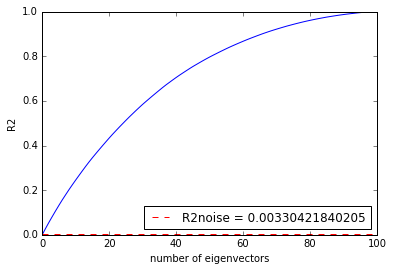

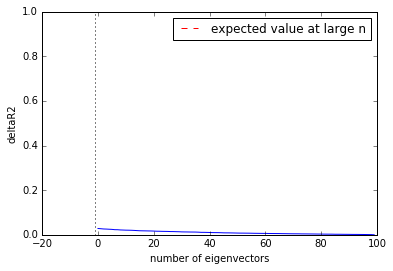

In [27]:
e = classic_pca(data,nvec=100)
vecs = len(e.eigvec)
R2Array = np.zeros(vecs+1)
for vec in range(vecs+1):
    R2Array[vec] = e.R2(vec)

Vdata = e._unmasked_data_var
                                                
Vnoise = np.mean(1./(e.weights[e.weights!=0]))

Vnoise = Sd**2

R2noise = 1.-(Vnoise/Vdata)
print Vnoise, Vdata, R2noise

plt.figure()
plt.plot(R2Array)
plt.axhline(R2noise,ls='--',color='r',label = 'R2noise = {0}'.format(R2noise))
plt.ylim(0,1)
plt.ylabel('R2')
plt.legend(loc='best')
plt.xlabel('number of eigenvectors')
deltR2 = (R2Array-np.roll(R2Array,1))[1:]
if cross_streams(R2Array,R2noise):
    plt.axvline(cross_streams(R2Array,R2noise),color='k',ls=':')
plt.figure()
if cross_streams(deltR2,Sd**2/Vdata,gt=False):
    plt.axvline(cross_streams(deltR2,Sd**2/Vdata,gt=False),color='k',ls=':')
plt.plot(deltR2)
plt.axhline(Sd**2/Vdata,ls='--',color='r',label = 'expected value at large n')
plt.legend(loc = 'best')
plt.ylabel('deltaR2')
plt.xlabel('number of eigenvectors')

## 150 eigenvectors ##

0.49 0.491624434503 0.00330421840205


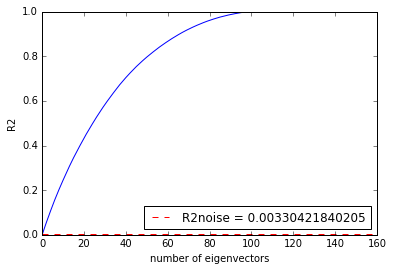

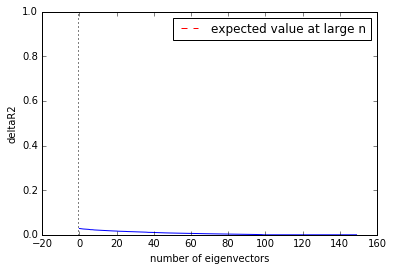

In [28]:
e = classic_pca(data,nvec=150)
vecs = len(e.eigvec)
R2Array = np.zeros(vecs+1)
for vec in range(vecs+1):
    R2Array[vec] = e.R2(vec)

Vdata = e._unmasked_data_var
                                                
Vnoise = np.mean(1./(e.weights[e.weights!=0]))
Vnoise = Sd**2

R2noise = 1.-(Vnoise/Vdata)
print Vnoise, Vdata, R2noise

plt.figure()
plt.plot(R2Array)
plt.axhline(R2noise,ls='--',color='r',label = 'R2noise = {0}'.format(R2noise))
plt.ylim(0,1)
plt.ylabel('R2')
plt.legend(loc='best')
plt.xlabel('number of eigenvectors')
deltR2 = (R2Array-np.roll(R2Array,1))[1:]
if cross_streams(R2Array,R2noise):
    plt.axvline(cross_streams(R2Array,R2noise),color='k',ls=':')
plt.figure()
if cross_streams(deltR2,Sd**2/Vdata,gt=False):
    plt.axvline(cross_streams(deltR2,Sd**2/Vdata,gt=False),color='k',ls=':')
plt.plot(deltR2)
plt.axhline(Sd**2/Vdata,ls='--',color='r',label = 'expected value at large n')
plt.legend(loc = 'best')
plt.ylabel('deltaR2')
plt.xlabel('number of eigenvectors')

# Signal Test #

       iter        R2             rchi2
EMPCA  1/10       0.20916923     -0.74081317
EMPCA  2/10       1.00000000     -0.00000001
EMPCA  3/10       1.00000000     -0.00000000
EMPCA  4/10       1.00000000     -0.00000000
EMPCA  5/10       1.00000000     -0.00000000
EMPCA  6/10       1.00000000     -0.00000000
EMPCA  7/10       1.00000000     -0.00000000
EMPCA  8/10       1.00000000     -0.00000000
EMPCA  9/10       1.00000000     -0.00000000
EMPCA 10/10       1.00000000     -0.00000000
R2: 1.0
1.0 0.00488677645209 -203.633874662


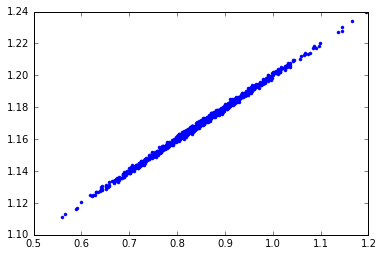

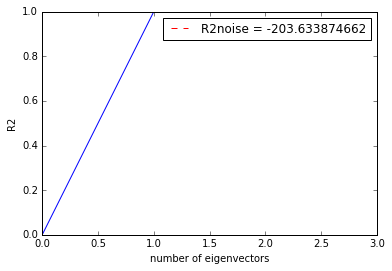

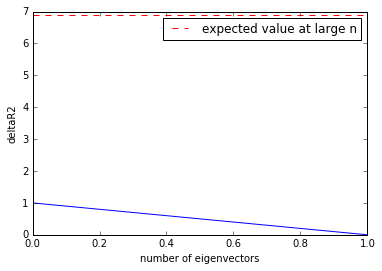

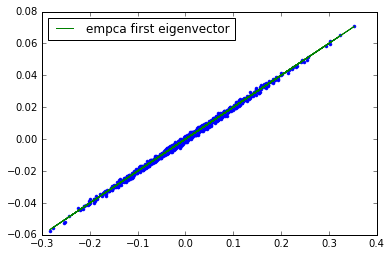

In [39]:
# Run a test sample with actual signal in the data

N = 1000
D = 2
sigma = 0.1
data = np.zeros((N,D))
data[:,0] = np.random.normal(loc=2*np.random.random(),size=N,scale = sigma)
data[:,1] = 0.2*data[:,0] + 1
data[:,1] += 0.001*np.random.randn(len(data[:,1]))
uncertainty = np.ones(data.shape)*sigma

Sd = np.sum(noise[:,0]**2)/N

plt.plot(data[:,0],data[:,1],'.')

nvec=2


e = empca(data,nvec=nvec,niter=10)
p = classic_pca(data,nvec=nvec)

vecs = len(e.eigvec)
R2Array = np.zeros(vecs+1)
for vec in range(vecs+1):
    R2Array[vec] = e.R2(vec)

Vdata = e._unmasked_data_var
                                                
Vnoise = np.mean(1./(e.weights[e.weights!=0]))

R2noise = 1.-(Vnoise/Vdata)
print Vnoise, Vdata, R2noise

plt.figure()
plt.plot(R2Array)
plt.axhline(R2noise,ls='--',color='r',label = 'R2noise = {0}'.format(R2noise))
plt.ylim(0,1)
plt.xlim(0,len(R2Array))
plt.ylabel('R2')
plt.legend(loc='best')
plt.xlabel('number of eigenvectors')
deltR2 = (R2Array-np.roll(R2Array,1))[1:]
if cross_streams(R2Array,R2noise):
    plt.axvline(cross_streams(R2Array,R2noise),color='k',ls=':')
plt.figure()
if cross_streams(deltR2,Sd**2/Vdata,gt=False):
    plt.axvline(cross_streams(deltR2,Sd**2/Vdata,gt=False),color='k',ls=':')
plt.plot(deltR2)
plt.axhline(Sd/Vdata,ls='--',color='r',label = 'expected value at large n')
plt.legend(loc = 'best')
plt.ylabel('deltaR2')
plt.xlabel('number of eigenvectors')

mx = np.zeros(e.data.shape)
for i in range(nvec):
    mx += e._model_vec(i)

d = mx - e.data

plt.figure()
plt.plot(e.data[:,0],e.data[:,1],'.')
#plt.plot(e.coeff[:,0]*e.eigvec[0][0]+np.mean(data,axis=0)[0],e.coeff[:,0]*e.eigvec[0][1]+np.mean(data,axis=0)[1],label='empca first eigenvector')
plt.plot(e._model_vec(0)[:,0],e._model_vec(0)[:,1],label='empca first eigenvector')
#plt.plot(p.coeff[:,0]*p.eigvec[0][0]+np.mean(data),p.coeff[:,0]*p.eigvec[0][1]+np.mean(data),label='classic first eigenvector')
plt.legend(loc='best')
#plt.plot(mx[:,0],mx[:,1],'.')

# N > D Case #

In [41]:
N = 400
D = 3
data,uncertainty,Sd = makemydata(N,D)

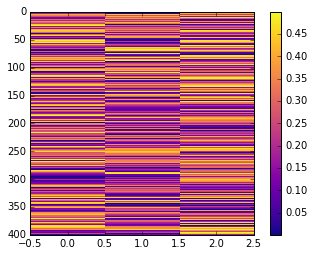

In [42]:
plt.imshow(noise,cmap='plasma',aspect = float(noise.shape[1])/noise.shape[0],interpolation='nearest')
plt.colorbar()

## 2 eigenvector

       iter        R2             rchi2
EMPCA  1/10       0.87655897      0.98519575
EMPCA  2/10       0.84769486      0.96939079
EMPCA  3/10       0.82130284      0.95472012
EMPCA  4/10       0.80371489      0.94188123
EMPCA  5/10       0.77990138      0.93120260
EMPCA  6/10       0.77668286      0.92267997
EMPCA  7/10       0.78011282      0.91608903
EMPCA  8/10       0.78272017      0.91110529
EMPCA  9/10       0.78839290      0.90739183
EMPCA 10/10       0.79483877      0.90464748
R2: 0.801415011377
0.25 0.24374886422 -0.0256458047523


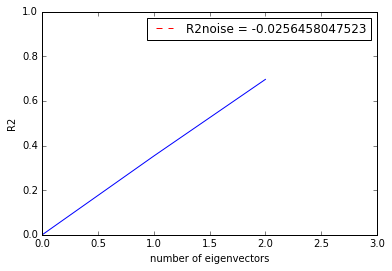

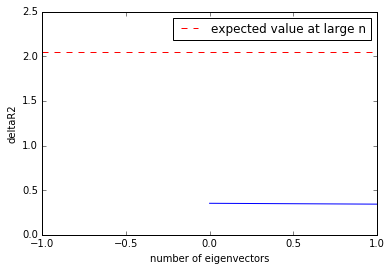

In [43]:
nvec = 2
e = empca(data,weights = 1./uncertainty**2,nvec=nvec,niter=10)

vecs = len(e.eigvec)
R2Array = np.zeros(vecs+1)
for vec in range(vecs+1):
    R2Array[vec] = e.R2(vec)

Vdata = e._unmasked_data_var
                                                
Vnoise = np.mean(1./(e.weights[e.weights!=0]))

R2noise = 1.-(Vnoise/Vdata)
print Vnoise, Vdata, R2noise

plt.figure()
plt.plot(R2Array)
plt.axhline(R2noise,ls='--',color='r',label = 'R2noise = {0}'.format(R2noise))
plt.ylabel('R2')
plt.ylim(0,1)
plt.xlim(0,len(R2Array))
plt.legend(loc='best')
plt.xlabel('number of eigenvectors')
deltR2 = (R2Array-np.roll(R2Array,1))[1:]
if cross_streams(R2Array,R2noise):
    plt.axvline(cross_streams(R2Array,R2noise),color='k',ls=':')
plt.figure()
if cross_streams(deltR2,Sd**2/Vdata,gt=False):
    plt.axvline(cross_streams(deltR2,Sd**2/Vdata,gt=False),color='k',ls=':')
plt.plot(deltR2)
plt.axhline(Sd/Vdata,ls='--',color='r',label = 'expected value at large n')
plt.legend(loc = 'best')
plt.ylabel('deltaR2')
plt.xlabel('number of eigenvectors')

## 3 eigenvectors 

       iter        R2             rchi2
EMPCA  1/10       0.99587690     -0.69783363
EMPCA  2/10       0.99651425     -0.67272868
EMPCA  3/10       0.99714887     -0.61863368
EMPCA  4/10       0.99774566     -0.54611820
EMPCA  5/10       0.99833468     -0.46700135
EMPCA  6/10       0.99873382     -0.39074694
EMPCA  7/10       0.99888634     -0.32298243
EMPCA  8/10       0.99899745     -0.26586877
EMPCA  9/10       0.99905320     -0.21927109
EMPCA 10/10       0.99905386     -0.18190295
R2: 1.0
0.25 0.24374886422 -0.0256458047523


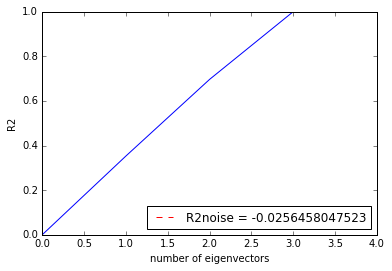

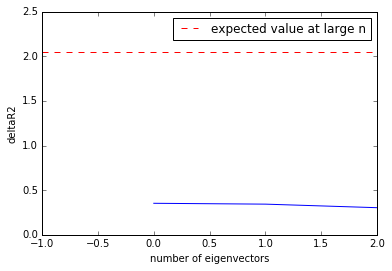

In [45]:
nvec = 3
e = empca(data,weights = 1./uncertainty**2,nvec=nvec,niter=10)

vecs = len(e.eigvec)
R2Array = np.zeros(vecs+1)
for vec in range(vecs+1):
    R2Array[vec] = e.R2(vec)

Vdata = e._unmasked_data_var
                                                
Vnoise = np.mean(1./(e.weights[e.weights!=0]))

R2noise = 1.-(Vnoise/Vdata)
print Vnoise, Vdata, R2noise

plt.figure()
plt.plot(R2Array)
plt.axhline(R2noise,ls='--',color='r',label = 'R2noise = {0}'.format(R2noise))
plt.ylabel('R2')
plt.ylim(0,1)
plt.xlim(0,len(R2Array))
plt.legend(loc='best')
plt.xlabel('number of eigenvectors')
deltR2 = (R2Array-np.roll(R2Array,1))[1:]
if cross_streams(R2Array,R2noise):
    plt.axvline(cross_streams(R2Array,R2noise),color='k',ls=':')
plt.figure()
if cross_streams(deltR2,Sd**2/Vdata,gt=False):
    plt.axvline(cross_streams(deltR2,Sd**2/Vdata,gt=False),color='k',ls=':')
plt.plot(deltR2)
plt.axhline(Sd/Vdata,ls='--',color='r',label = 'expected value at large n')
plt.legend(loc = 'best')
plt.ylabel('deltaR2')
plt.xlabel('number of eigenvectors')

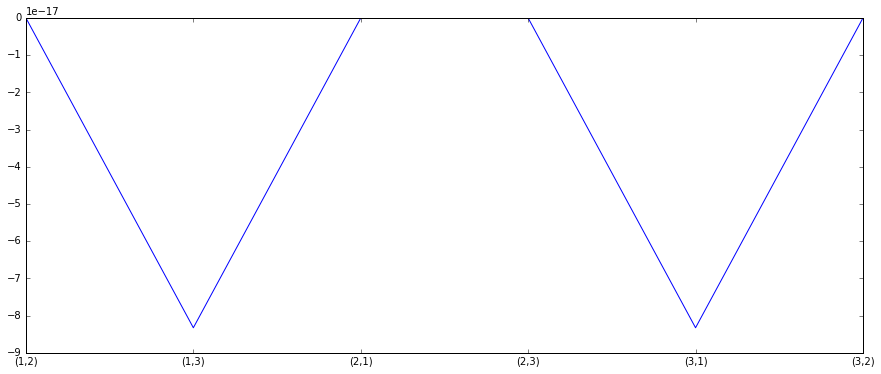

In [46]:
orthog_check = zeros(len(e.eigvec)**2-len(e.eigvec))
k = 0
pairs = []
for i in range(len(e.eigvec)):
    for j in range(len(e.eigvec)):
        if i!=j:
            orthog_check[k] = np.dot(e.eigvec[i],e.eigvec[j])
            k+=1
            pairs.append('({0},{1})'.format(i+1,j+1))
plt.figure(figsize=(15,6))
plt.plot(orthog_check)
labels = plt.xticks(range(len(orthog_check)),pairs)

## 5 eigenvectors ##

       iter        R2             rchi2
EMPCA  1/10       0.69994526     -0.96828291
EMPCA  2/10       0.76155617     -0.88740469
EMPCA  3/10       0.31520681     -0.99318051
EMPCA  4/10              nan             nan
EMPCA  5/10              nan             nan
EMPCA  6/10              nan             nan
EMPCA  7/10              nan             nan
EMPCA  8/10              nan             nan
EMPCA  9/10              nan             nan
EMPCA 10/10              nan             nan
R2: nan
0.25 0.24374886422 -0.0256458047523


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in greater
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in less
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in less


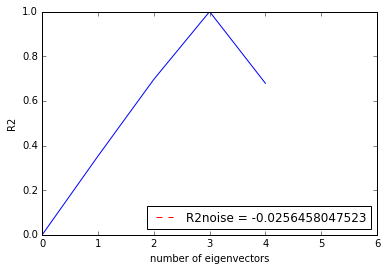

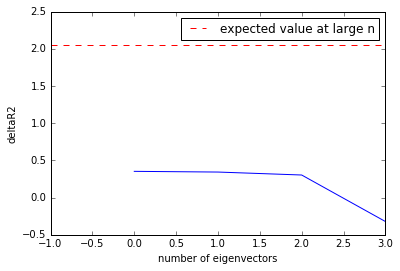

In [48]:
nvec = 5
e = empca(data,weights = 1./uncertainty**2,nvec=nvec,niter=10)

vecs = len(e.eigvec)
R2Array = np.zeros(vecs+1)
for vec in range(vecs+1):
    R2Array[vec] = e.R2(vec)

Vdata = e._unmasked_data_var
                                                
Vnoise = np.mean(1./(e.weights[e.weights!=0]))

R2noise = 1.-(Vnoise/Vdata)
print Vnoise, Vdata, R2noise

plt.figure()
plt.plot(R2Array)
plt.axhline(R2noise,ls='--',color='r',label = 'R2noise = {0}'.format(R2noise))
plt.ylabel('R2')
plt.ylim(0,1)
plt.xlim(0,len(R2Array))
plt.legend(loc='best')
plt.xlabel('number of eigenvectors')
deltR2 = (R2Array-np.roll(R2Array,1))[1:]
if cross_streams(R2Array,R2noise):
    plt.axvline(cross_streams(R2Array,R2noise),color='k',ls=':')
plt.figure()
if cross_streams(deltR2,Sd**2/Vdata,gt=False):
    plt.axvline(cross_streams(deltR2,Sd**2/Vdata,gt=False),color='k',ls=':')
plt.plot(deltR2)
plt.axhline(Sd/Vdata,ls='--',color='r',label = 'expected value at large n')
plt.legend(loc = 'best')
plt.ylabel('deltaR2')
plt.xlabel('number of eigenvectors')

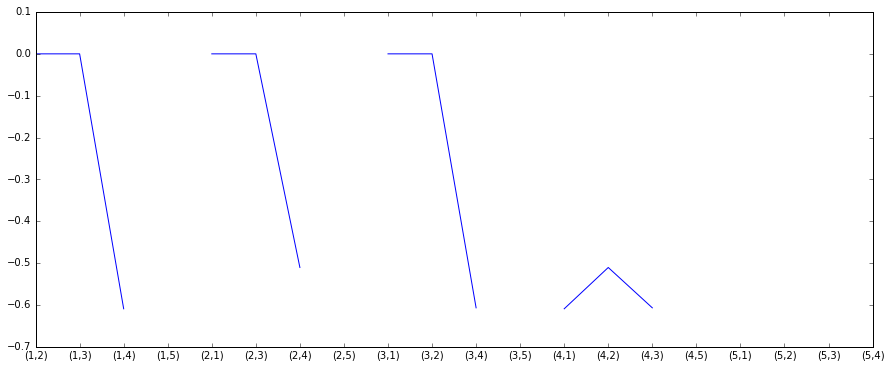

In [49]:
orthog_check = zeros(len(e.eigvec)**2-len(e.eigvec))
k = 0
pairs = []
for i in range(len(e.eigvec)):
    for j in range(len(e.eigvec)):
        if i!=j:
            orthog_check[k] = np.dot(e.eigvec[i],e.eigvec[j])
            k+=1
            pairs.append('({0},{1})'.format(i+1,j+1))
plt.figure(figsize=(15,6))
plt.plot(orthog_check)
labels = plt.xticks(range(len(orthog_check)),pairs)

# N < D Case #

In [50]:
N = 50
D = 400
data,uncertainty,Sd = makemydata(N,D)

## 10 eigenvectors

       iter        R2             rchi2
EMPCA  1/10       0.12297127      1.13105404
EMPCA  2/10       0.27060239      0.95008734
EMPCA  3/10       0.28721537      0.92166059
EMPCA  4/10       0.30257447      0.90494538
EMPCA  5/10       0.31311800      0.89505467
EMPCA  6/10       0.31934078      0.88887099
EMPCA  7/10       0.31978184      0.88475972
EMPCA  8/10       0.31052099      0.88189631
EMPCA  9/10       0.31113302      0.87983024
EMPCA 10/10       0.31122116      0.87829488
R2: 0.312828024356
0.25 0.24563298114 -0.0177786339611


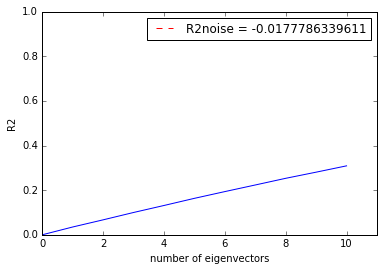

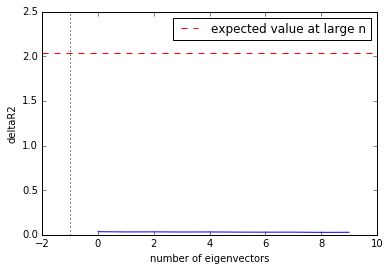

In [51]:
nvec = 10
e = empca(data,weights = 1./uncertainty**2,nvec=nvec,niter=10)

vecs = len(e.eigvec)
R2Array = np.zeros(vecs+1)
for vec in range(vecs+1):
    R2Array[vec] = e.R2(vec)

Vdata = e._unmasked_data_var
                                                
Vnoise = np.mean(1./(e.weights[e.weights!=0]))

R2noise = 1.-(Vnoise/Vdata)
print Vnoise, Vdata, R2noise

plt.figure()
plt.plot(R2Array)
plt.axhline(R2noise,ls='--',color='r',label = 'R2noise = {0}'.format(R2noise))
plt.ylabel('R2')
plt.ylim(0,1)
plt.xlim(0,len(R2Array))
plt.legend(loc='best')
plt.xlabel('number of eigenvectors')
deltR2 = (R2Array-np.roll(R2Array,1))[1:]
if cross_streams(R2Array,R2noise):
    plt.axvline(cross_streams(R2Array,R2noise),color='k',ls=':')
plt.figure()
if cross_streams(deltR2,Sd**2/Vdata,gt=False):
    plt.axvline(cross_streams(deltR2,Sd**2/Vdata,gt=False),color='k',ls=':')
plt.plot(deltR2)
plt.axhline(Sd/Vdata,ls='--',color='r',label = 'expected value at large n')
plt.legend(loc = 'best')
plt.ylabel('deltaR2')
plt.xlabel('number of eigenvectors')

## 30 eigenvectors

       iter        R2             rchi2
EMPCA  1/10       0.28220868      2.17781144
EMPCA  2/10       0.66736353      1.02625126
EMPCA  3/10       0.70175351      0.92621753
EMPCA  4/10       0.71955262      0.86811074
EMPCA  5/10       0.72393200      0.83309882
EMPCA  6/10       0.73123951      0.81160302
EMPCA  7/10       0.73592749      0.79790644
EMPCA  8/10       0.73914276      0.78866404
EMPCA  9/10       0.74319272      0.78200400
EMPCA 10/10       0.74682777      0.77690061
R2: 0.751550243396
0.25 0.24563298114 -0.0177786339611


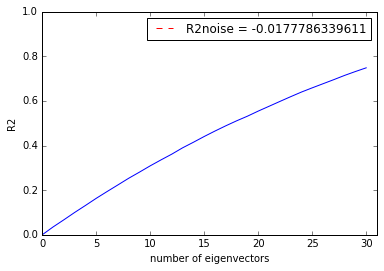

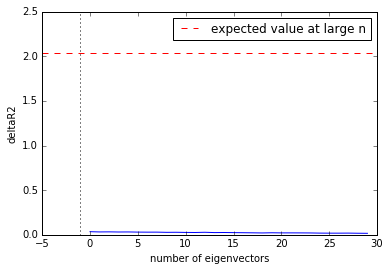

In [52]:
nvec = 30
e = empca(data,weights = 1./uncertainty**2,nvec=nvec,niter=10)

vecs = len(e.eigvec)
R2Array = np.zeros(vecs+1)
for vec in range(vecs+1):
    R2Array[vec] = e.R2(vec)

Vdata = e._unmasked_data_var
                                                
Vnoise = np.mean(1./(e.weights[e.weights!=0]))

R2noise = 1.-(Vnoise/Vdata)
print Vnoise, Vdata, R2noise

plt.figure()
plt.plot(R2Array)
plt.axhline(R2noise,ls='--',color='r',label = 'R2noise = {0}'.format(R2noise))
plt.ylabel('R2')
plt.ylim(0,1)
plt.xlim(0,len(R2Array))
plt.legend(loc='best')
plt.xlabel('number of eigenvectors')
deltR2 = (R2Array-np.roll(R2Array,1))[1:]
if cross_streams(R2Array,R2noise):
    plt.axvline(cross_streams(R2Array,R2noise),color='k',ls=':')
plt.figure()
if cross_streams(deltR2,Sd**2/Vdata,gt=False):
    plt.axvline(cross_streams(deltR2,Sd**2/Vdata,gt=False),color='k',ls=':')
plt.plot(deltR2)
plt.axhline(Sd/Vdata,ls='--',color='r',label = 'expected value at large n')
plt.legend(loc = 'best')
plt.ylabel('deltaR2')
plt.xlabel('number of eigenvectors')

## 50 eigenvectors

       iter        R2             rchi2
EMPCA  1/10       0.33238631     -5.26059996
EMPCA  2/10       0.91288168     -0.69559166
EMPCA  3/10       0.94596988     -0.43533395
EMPCA  4/10       0.96463771     -0.28226534
EMPCA  5/10       0.97573315     -0.19219546
EMPCA  6/10       0.98273280     -0.13777616
EMPCA  7/10       0.98694434     -0.10266028
EMPCA  8/10       0.98986984     -0.08027058
EMPCA  9/10       0.99199406     -0.06371528
EMPCA 10/10       0.99347771     -0.05194480
R2: 0.999992163218
0.25 0.24563298114 -0.0177786339611


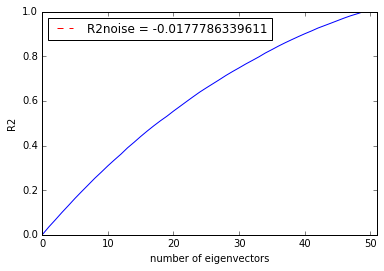

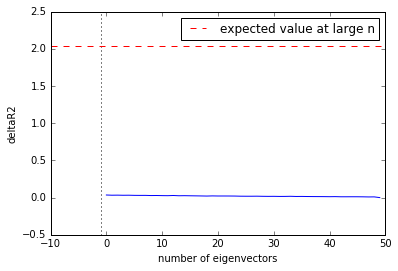

In [53]:
nvec = 50
e = empca(data,weights = 1./uncertainty**2,nvec=nvec,niter=10)

vecs = len(e.eigvec)
R2Array = np.zeros(vecs+1)
for vec in range(vecs+1):
    R2Array[vec] = e.R2(vec)

Vdata = e._unmasked_data_var
                                                
Vnoise = np.mean(1./(e.weights[e.weights!=0]))

R2noise = 1.-(Vnoise/Vdata)
print Vnoise, Vdata, R2noise

plt.figure()
plt.plot(R2Array)
plt.axhline(R2noise,ls='--',color='r',label = 'R2noise = {0}'.format(R2noise))
plt.ylabel('R2')
plt.ylim(0,1)
plt.xlim(0,len(R2Array))
plt.legend(loc='best')
plt.xlabel('number of eigenvectors')
deltR2 = (R2Array-np.roll(R2Array,1))[1:]
if cross_streams(R2Array,R2noise):
    plt.axvline(cross_streams(R2Array,R2noise),color='k',ls=':')
plt.figure()
if cross_streams(deltR2,Sd**2/Vdata,gt=False):
    plt.axvline(cross_streams(deltR2,Sd**2/Vdata,gt=False),color='k',ls=':')
plt.plot(deltR2)
plt.axhline(Sd/Vdata,ls='--',color='r',label = 'expected value at large n')
plt.legend(loc = 'best')
plt.ylabel('deltaR2')
plt.xlabel('number of eigenvectors')

## 100 eigenvectors

       iter        R2             rchi2
EMPCA  1/10       0.21787734     -0.61927674
EMPCA  2/10       0.82379035     -0.14148280
EMPCA  3/10       0.90384906     -0.07793827
EMPCA  4/10       0.92809208     -0.05763805
EMPCA  5/10       0.94370323     -0.04664437
EMPCA  6/10       0.95349182     -0.03861250
EMPCA  7/10       0.96079184     -0.03194549
EMPCA  8/10       0.96434163     -0.02978952
EMPCA  9/10       0.97121740     -0.02355278
EMPCA 10/10       0.97192282     -0.02424037
R2: 0.978646660281
0.25 0.24563298114 -0.0177786339611


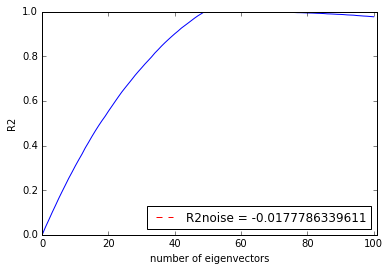

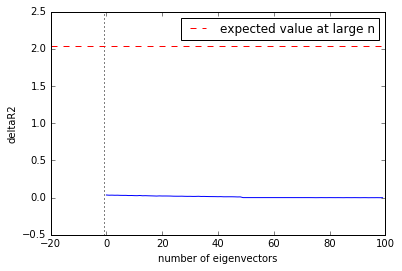

In [54]:
nvec = 100
e = empca(data,weights = 1./uncertainty**2,nvec=nvec,niter=10)

vecs = len(e.eigvec)
R2Array = np.zeros(vecs+1)
for vec in range(vecs+1):
    R2Array[vec] = e.R2(vec)

Vdata = e._unmasked_data_var
                                                
Vnoise = np.mean(1./(e.weights[e.weights!=0]))

R2noise = 1.-(Vnoise/Vdata)
print Vnoise, Vdata, R2noise

plt.figure()
plt.plot(R2Array)
plt.axhline(R2noise,ls='--',color='r',label = 'R2noise = {0}'.format(R2noise))
plt.ylabel('R2')
plt.ylim(0,1)
plt.xlim(0,len(R2Array))
plt.legend(loc='best')
plt.xlabel('number of eigenvectors')
deltR2 = (R2Array-np.roll(R2Array,1))[1:]
if cross_streams(R2Array,R2noise):
    plt.axvline(cross_streams(R2Array,R2noise),color='k',ls=':')
plt.figure()
if cross_streams(deltR2,Sd**2/Vdata,gt=False):
    plt.axvline(cross_streams(deltR2,Sd**2/Vdata,gt=False),color='k',ls=':')
plt.plot(deltR2)
plt.axhline(Sd/Vdata,ls='--',color='r',label = 'expected value at large n')
plt.legend(loc = 'best')
plt.ylabel('deltaR2')
plt.xlabel('number of eigenvectors')

## 400 eigenvectors

       iter        R2             rchi2
EMPCA  1/10      -0.53079368     -0.18988589
EMPCA  2/10       0.12676409     -0.10775677
EMPCA  3/10       0.16840004     -0.10133208
EMPCA  4/10       0.20337903     -0.09878953
EMPCA  5/10       0.21938850     -0.09696515
EMPCA  6/10       0.22948281     -0.09582861
EMPCA  7/10       0.22726024     -0.09435385
EMPCA  8/10       0.23397387     -0.09423004
EMPCA  9/10       0.25451202     -0.09342618
EMPCA 10/10       0.23721286     -0.09482958
R2: 0.236272242131
0.25 0.24563298114 -0.0177786339611


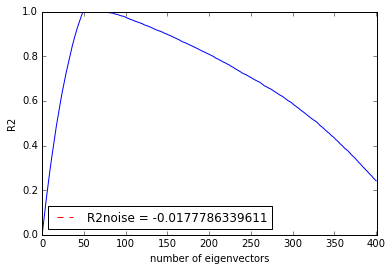

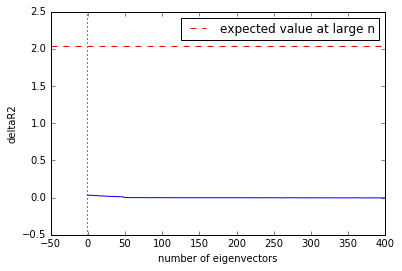

In [55]:
nvec = 400
e = empca(data,weights = 1./uncertainty**2,nvec=nvec,niter=10)

vecs = len(e.eigvec)
R2Array = np.zeros(vecs+1)
for vec in range(vecs+1):
    R2Array[vec] = e.R2(vec)

Vdata = e._unmasked_data_var
                                                
Vnoise = np.mean(1./(e.weights[e.weights!=0]))

R2noise = 1.-(Vnoise/Vdata)
print Vnoise, Vdata, R2noise

plt.figure()
plt.plot(R2Array)
plt.axhline(R2noise,ls='--',color='r',label = 'R2noise = {0}'.format(R2noise))
plt.ylabel('R2')
plt.ylim(0,1)
plt.xlim(0,len(R2Array))
plt.legend(loc='best')
plt.xlabel('number of eigenvectors')
deltR2 = (R2Array-np.roll(R2Array,1))[1:]
if cross_streams(R2Array,R2noise):
    plt.axvline(cross_streams(R2Array,R2noise),color='k',ls=':')
plt.figure()
if cross_streams(deltR2,Sd**2/Vdata,gt=False):
    plt.axvline(cross_streams(deltR2,Sd**2/Vdata,gt=False),color='k',ls=':')
plt.plot(deltR2)
plt.axhline(Sd/Vdata,ls='--',color='r',label = 'expected value at large n')
plt.legend(loc = 'best')
plt.ylabel('deltaR2')
plt.xlabel('number of eigenvectors')